In [6]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'FReD-2024-11-29_cleaned.csv'
data = pd.read_csv(file_path)

# Filter the dataset to include only "Failure" and "Success"
filtered_data = data[data['result'].isin(['Failure', 'Success'])]

# Encode the target variable
label_encoder = LabelEncoder()
filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])

# Define features and target variable
X_filtered = filtered_data.drop(columns=['result', 'result_encoded'])
y_filtered = filtered_data['result_encoded']

# Split the data into training and testing sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train the logistic regression model
model_f = LogisticRegression(max_iter=500, random_state=42)
model_f.fit(X_train_f, y_train_f)

# Make predictions
y_pred_f = model_f.predict(X_test_f)

# Evaluate the model
accuracy_f = accuracy_score(y_test_f, y_pred_f)
report_f = classification_report(y_test_f, y_pred_f, target_names=label_encoder.classes_[:2])

# Output the results
print(f"Accuracy: {accuracy_f}\n")
print("Classification Report:")
print(report_f)


Accuracy: 0.725

Classification Report:
              precision    recall  f1-score   support

     Failure       0.69      0.69      0.69        36
     Success       0.75      0.75      0.75        44

    accuracy                           0.72        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.72      0.72      0.72        80



<ipython-input-24-6c39fca80c49>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])


<ipython-input-25-e4749ccea740>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selecti

Best Parameters:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Optimized Logistic Regression Model:
Accuracy: 0.7125

Classification Report:
              precision    recall  f1-score   support

     Failure       0.71      0.61      0.66        36
     Success       0.71      0.80      0.75        44

    accuracy                           0.71        80
   macro avg       0.71      0.70      0.70        80
weighted avg       0.71      0.71      0.71        80



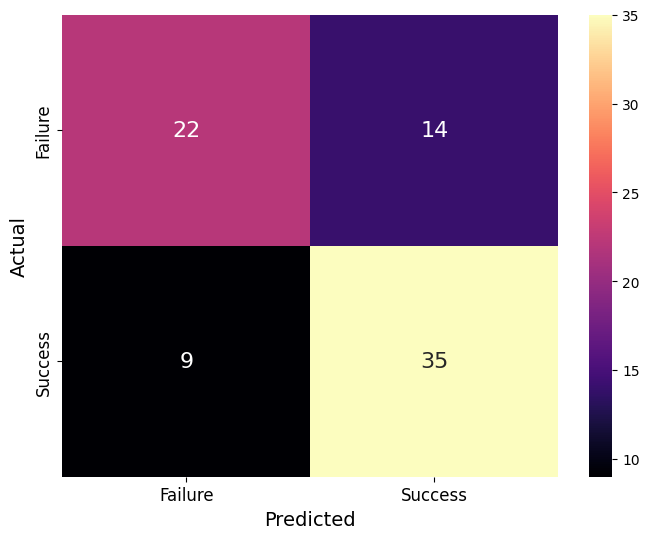

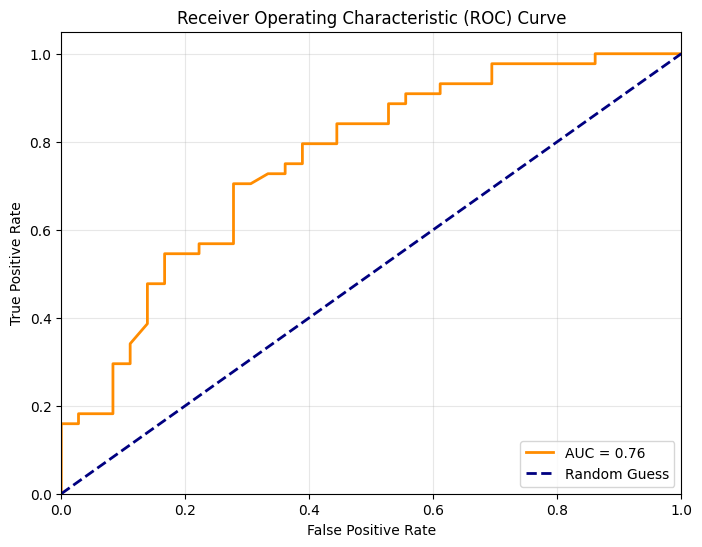

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'FReD-2024-11-29_cleaned.csv'
data = pd.read_csv(file_path)

# Filter the dataset to include only "Failure" and "Success"
filtered_data = data[data['result'].isin(['Failure', 'Success'])]

# Encode the target variable
label_encoder = LabelEncoder()
filtered_data['result_encoded'] = label_encoder.fit_transform(filtered_data['result'])

# Define features and target variable
X_filtered = filtered_data.drop(columns=['result', 'result_encoded'])
y_filtered = filtered_data['result_encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.2, random_state=42)

# Define the logistic regression model
model = LogisticRegression(max_iter=500, random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_[:2])

# Output the results
print("Best Parameters:")
print(grid_search.best_params_)
print("\nOptimized Logistic Regression Model:")
print(f"Accuracy: {accuracy}\n")
print("Classification Report:")
print(report)

# Plot confusion matrix for the optimized model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=label_encoder.classes_[:2], yticklabels=label_encoder.classes_[:2],annot_kws={"size": 16})
plt.title('Optimized Logistic Regression Confusion Matrix')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


Feature Importance:
             Feature  Importance
5  ci.upper_original   -3.119365
0        es_original    2.796294
3        vi_original    0.742147
4  ci.lower_original    0.679561
1         n_original    0.350008
2   p_value_original   -0.220508


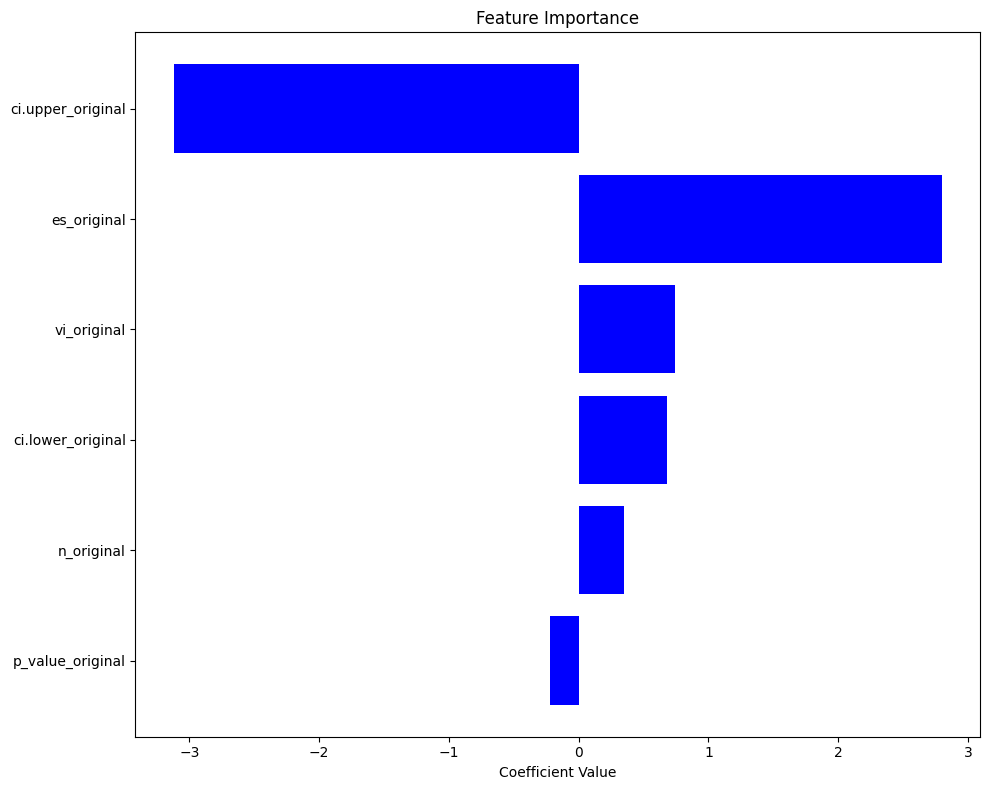

In [26]:
# Feature importance
feature_importance = best_model.coef_[0]  # Assuming binary classification
feature_names = X_filtered.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by absolute importance
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(importance_df[['Feature', 'Importance']])

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

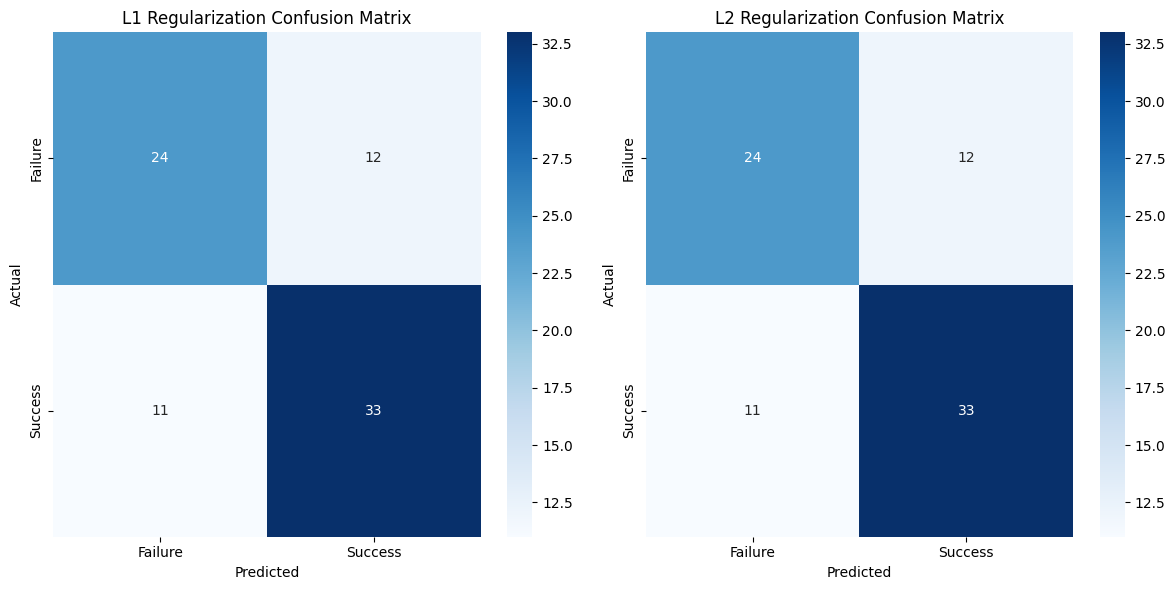

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Plot confusion matrices for L1 and L2 models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Confusion matrix for L1 model
cm_l1 = confusion_matrix(y_test, y_pred_l1)
sns.heatmap(cm_l1, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=label_encoder.classes_[:2], yticklabels=label_encoder.classes_[:2])
axes[0].set_title('L1 Regularization Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for L2 model
cm_l2 = confusion_matrix(y_test, y_pred_l2)
sns.heatmap(cm_l2, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=label_encoder.classes_[:2], yticklabels=label_encoder.classes_[:2])
axes[1].set_title('L2 Regularization Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()